In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn nltk textblob wordcloud


In [4]:
from google.colab import files
import pandas as pd

# File upload dialog
uploaded = files.upload()

# Uploaded file read
for filename in uploaded.keys():
    df = pd.read_csv(filename)
    print(f"Dataset '{filename}' loaded successfully!")

# First 5 rows
print(df.head())


Saving crop_yield.csv to crop_yield (4).csv
Dataset 'crop_yield (4).csv' loaded successfully!
  Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0   West     Sandy   Cotton   897.077239            27.676966   
1  South      Clay     Rice   992.673282            18.026142   
2  North      Loam   Barley   147.998025            29.794042   
3  North     Sandy  Soybean   986.866331            16.644190   
4  South      Silt    Wheat   730.379174            31.620687   

   Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0            False             True            Cloudy              122   
1             True             True             Rainy              140   
2            False            False             Sunny              106   
3            False             True             Rainy              146   
4             True             True            Cloudy              110   

   Yield_tons_per_hectare  
0                6.555816  
1             

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Dataset Shape:", df.shape)
print("Columns:", df.columns)
print("\nData Info:")
print(df.info())

Dataset Shape: (1000000, 10)
Columns: Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_

In [6]:
# Check Missing Values
print("\nMissing Values per Column:")
print(df.isnull().sum())



Missing Values per Column:
Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64


In [7]:
# Check Duplicate Rows
print("\nNumber of Duplicates:", df.duplicated().sum())



Number of Duplicates: 0



Column: Region
Region
North    250173
West     250074
South    250054
East     249699
Name: count, dtype: int64


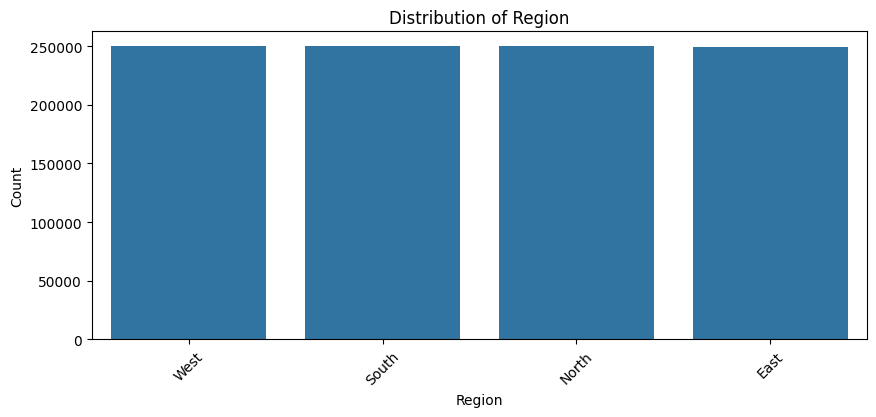


Column: Soil_Type
Soil_Type
Sandy     167119
Loam      166795
Chalky    166779
Silt      166672
Clay      166352
Peaty     166283
Name: count, dtype: int64


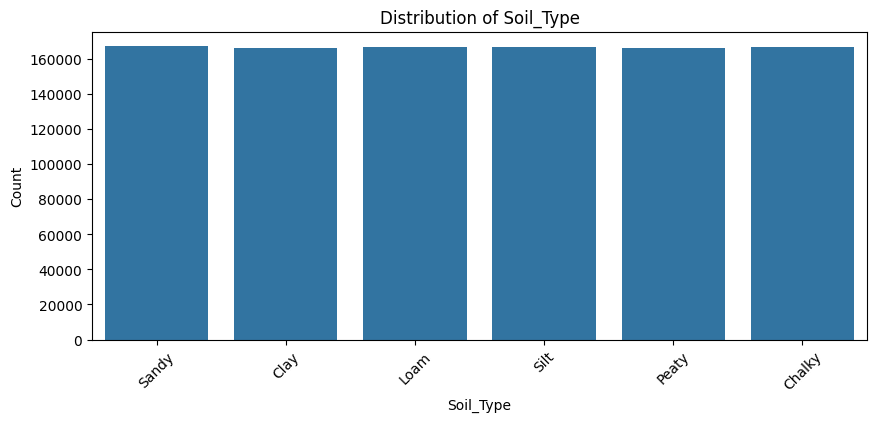


Column: Crop
Crop
Maize      166824
Rice       166792
Barley     166777
Wheat      166673
Cotton     166585
Soybean    166349
Name: count, dtype: int64


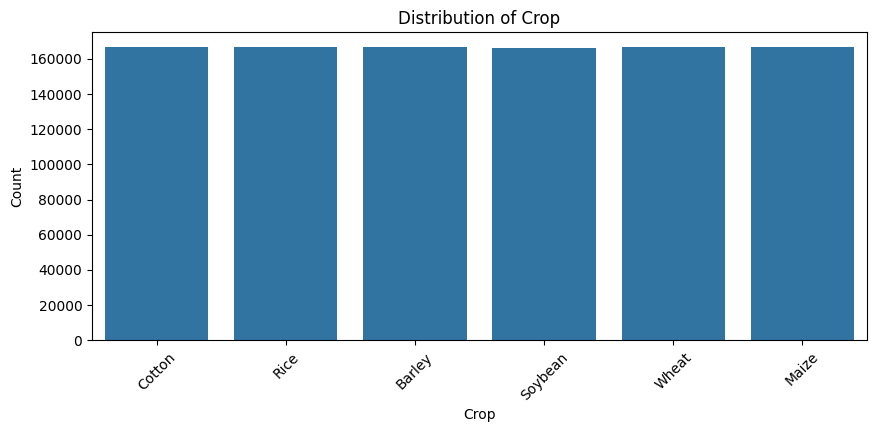


Column: Rainfall_mm (Numeric)
count    1000000.000000
mean         549.981901
std          259.851320
min          100.000896
25%          324.891090
50%          550.124061
75%          774.738520
max          999.998098
Name: Rainfall_mm, dtype: float64


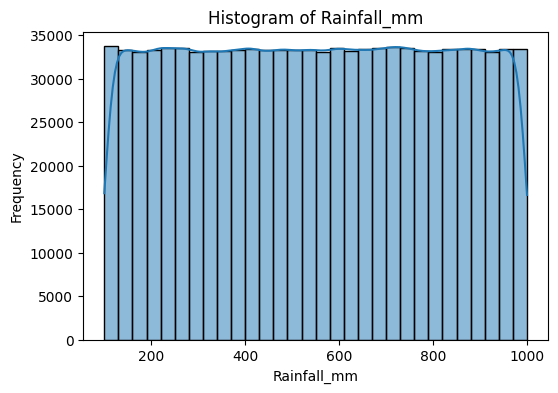


Column: Temperature_Celsius (Numeric)
count    1000000.000000
mean          27.504965
std            7.220608
min           15.000034
25%           21.254502
50%           27.507365
75%           33.753267
max           39.999997
Name: Temperature_Celsius, dtype: float64


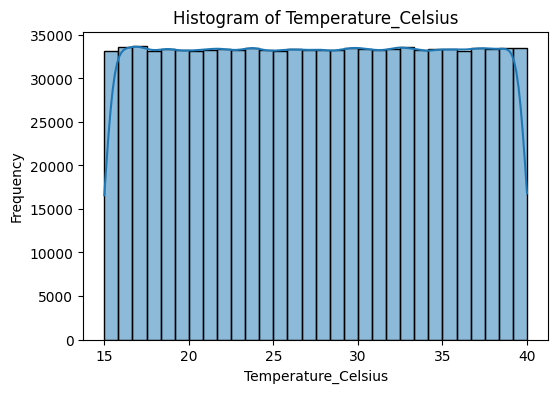


Column: Fertilizer_Used
Fertilizer_Used
False    500060
True     499940
Name: count, dtype: int64


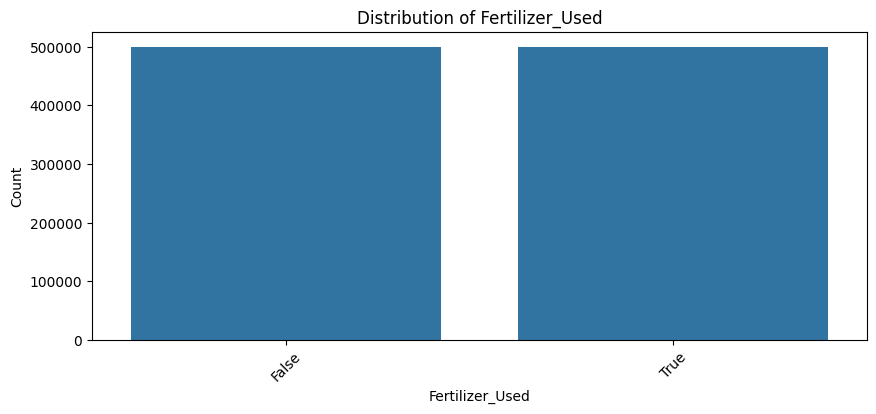


Column: Irrigation_Used
Irrigation_Used
False    500509
True     499491
Name: count, dtype: int64


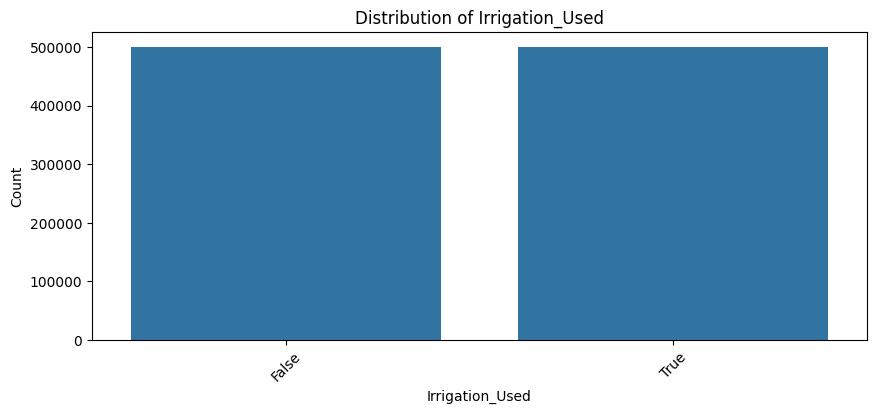


Column: Weather_Condition
Weather_Condition
Sunny     333790
Rainy     333561
Cloudy    332649
Name: count, dtype: int64


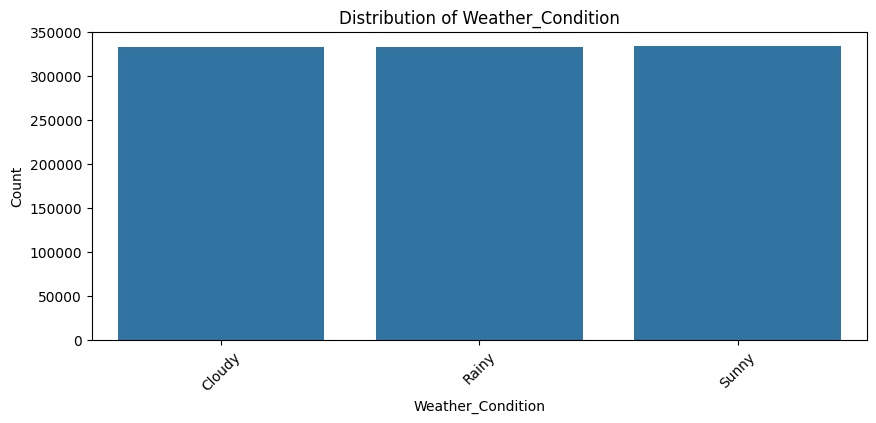


Column: Days_to_Harvest (Numeric)
count    1000000.000000
mean         104.495025
std           25.953412
min           60.000000
25%           82.000000
50%          104.000000
75%          127.000000
max          149.000000
Name: Days_to_Harvest, dtype: float64


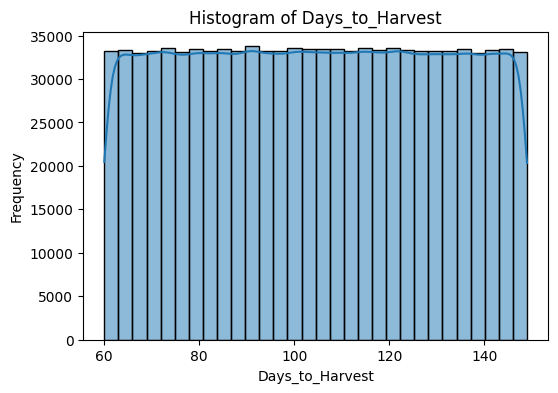


Column: Yield_tons_per_hectare (Numeric)
count    1000000.000000
mean           4.649472
std            1.696572
min           -1.147613
25%            3.417637
50%            4.651808
75%            5.879200
max            9.963372
Name: Yield_tons_per_hectare, dtype: float64


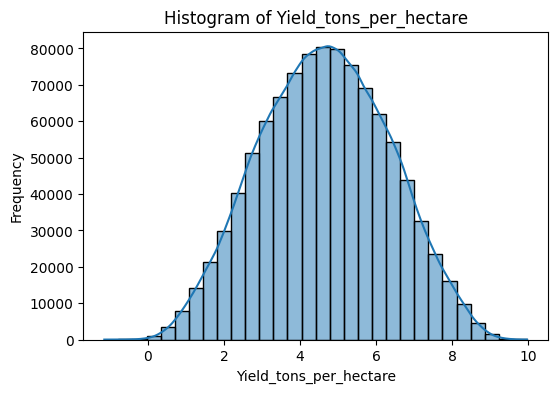

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots render inline
%matplotlib inline

# Loop over all columns
for col in df.columns:
    # Skip text columns if needed
    if df[col].dtype == 'object' or df[col].nunique() < 30:  # categorical or low-cardinality
        print(f"\nColumn: {col}")
        print(df[col].value_counts())

        # Plot distribution
        plt.figure(figsize=(10,4))
        sns.countplot(x=col, data=df)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()
    elif df[col].dtype in ['int64','float64']:  # numeric columns
        print(f"\nColumn: {col} (Numeric)")
        print(df[col].describe())

        # Histogram for numeric column
        plt.figure(figsize=(6,4))
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()



Column: Region
Region
North    250173
West     250074
South    250054
East     249699
Name: count, dtype: int64


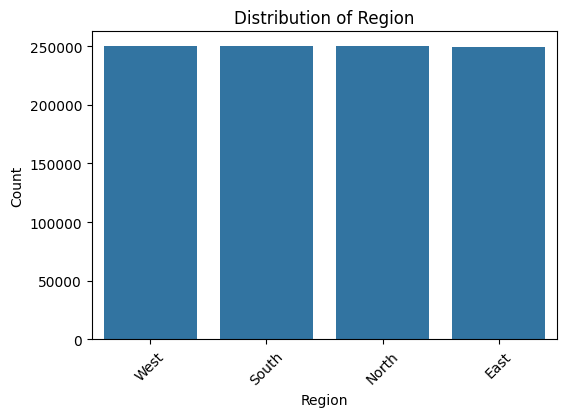


Column: Soil_Type
Soil_Type
Sandy     167119
Loam      166795
Chalky    166779
Silt      166672
Clay      166352
Peaty     166283
Name: count, dtype: int64


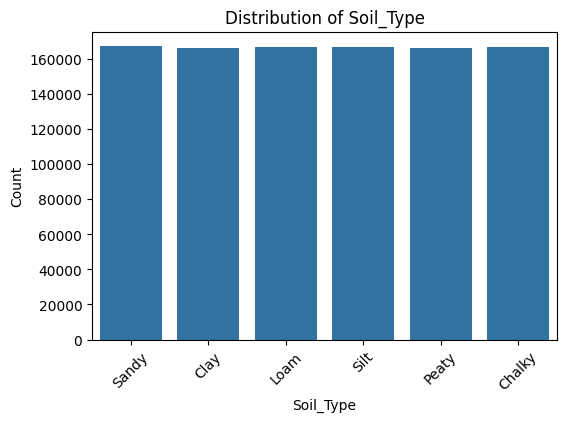


Column: Crop
Crop
Maize      166824
Rice       166792
Barley     166777
Wheat      166673
Cotton     166585
Soybean    166349
Name: count, dtype: int64


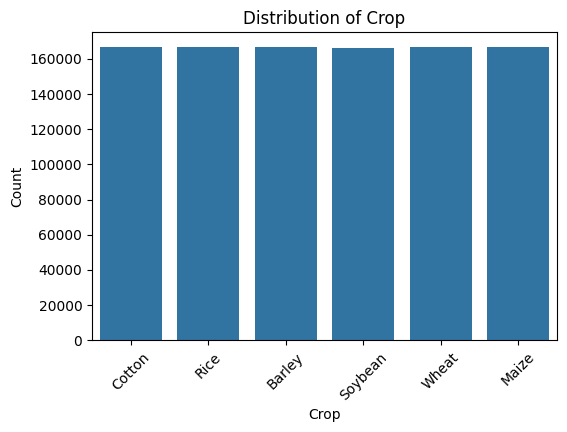


Column: Fertilizer_Used
Fertilizer_Used
False    500060
True     499940
Name: count, dtype: int64


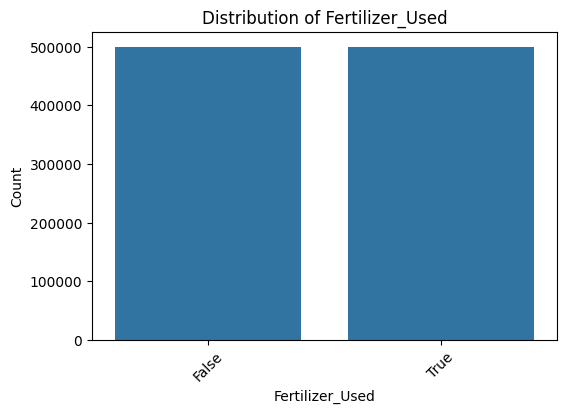


Column: Irrigation_Used
Irrigation_Used
False    500509
True     499491
Name: count, dtype: int64


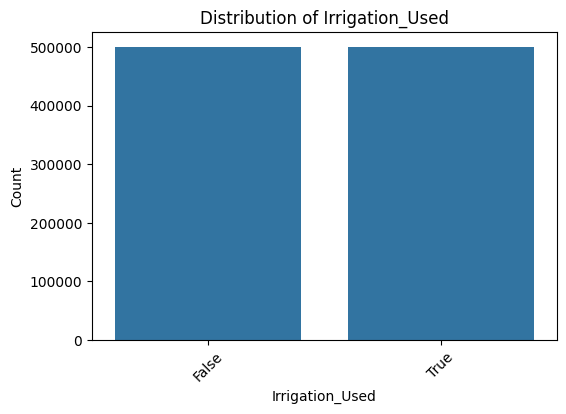


Column: Weather_Condition
Weather_Condition
Sunny     333790
Rainy     333561
Cloudy    332649
Name: count, dtype: int64


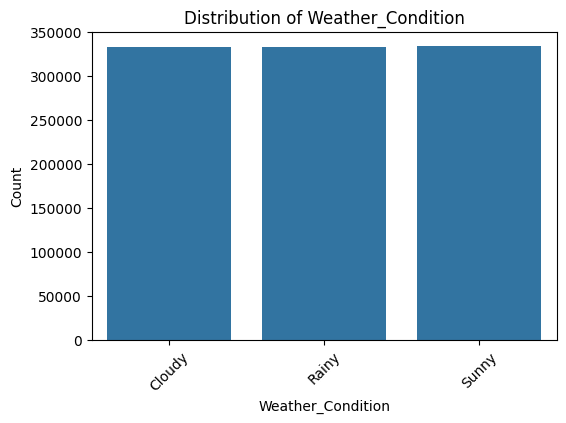

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots render inline
%matplotlib inline

# Loop over all columns
for col in df.columns:
    # Only categorical / object columns
    if df[col].dtype == 'object' or df[col].nunique() < 30:  # categorical or low-cardinality
        print(f"\nColumn: {col}")
        print(df[col].value_counts())

        # Plot distribution
        plt.figure(figsize=(6,4))
        sns.countplot(x=col, data=df)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()



In [10]:
numeric_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Days_to_Harvest', 'Yield_tons_per_hectare']
categorical_cols = ['Region', 'Soil_Type', 'Crop', 'Irrigation_Used', 'Weather_Condition']


In [11]:
# Numeric → fill with mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [12]:
# Categorical → fill with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [13]:
df = df.drop_duplicates()

In [14]:
# 1️⃣ Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# 2️⃣ Scale numeric columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# 3️⃣ Check processed dataset
print("Processed Dataset Shape:", df_encoded.shape)
print(df_encoded.head())


Processed Dataset Shape: (1000000, 21)
   Rainfall_mm  Temperature_Celsius  Fertilizer_Used  Irrigation_Used  \
0     1.335747             0.023821         -0.99988             True   
1     1.703634            -1.312747          1.00012             True   
2    -1.546977             0.317020         -0.99988            False   
3     1.681287            -1.504137         -0.99988             True   
4     0.694233             0.569997          1.00012             True   

   Days_to_Harvest  Yield_tons_per_hectare  Region_North  Region_South  \
0         0.674477                1.123645         False         False   
1         1.368028                2.285709         False          True   
2         0.057988               -2.075968          True         False   
3         1.599212                1.101103          True         False   
4         0.212110                1.531783         False          True   

   Region_West  Soil_Type_Clay  ...  Soil_Type_Peaty  Soil_Type_Sandy  \
0   

In [15]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop('Yield_tons_per_hectare', axis=1)
y = df_encoded['Yield_tons_per_hectare']

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Shape check
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (800000, 20)
Test set shape: (200000, 20)


In [16]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Gradient Boosting model
gbr = GradientBoostingRegressor(n_estimators=50, random_state=42)

# Train
gbr.fit(X_train, y_train)

# Predict
y_pred_gbr = gbr.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_gbr)
mse = mean_squared_error(y_test, y_pred_gbr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting:")
print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")


Gradient Boosting:
MAE:  0.2388
MSE:  0.0896
RMSE: 0.2993
R²:   0.9106


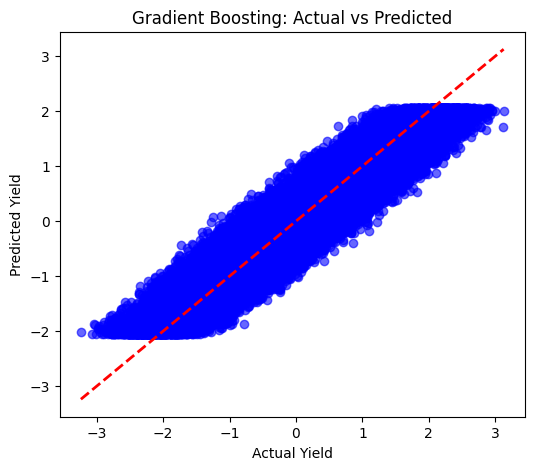

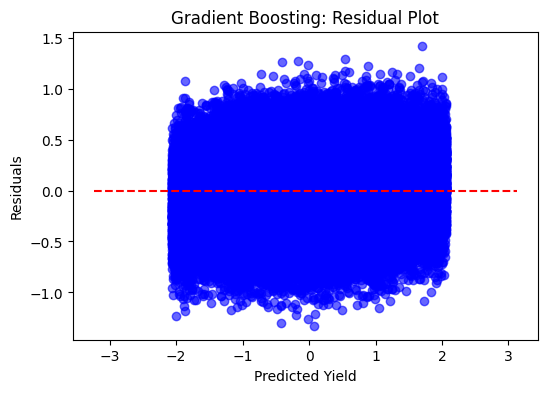

In [21]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_gbr, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.show()

# Residuals
plt.figure(figsize=(6,4))
plt.scatter(y_pred_gbr, y_test - y_pred_gbr, alpha=0.6, color='blue')
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='--')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Gradient Boosting: Residual Plot')
plt.show()


In [17]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest model
rf = RandomForestRegressor(n_estimators=50, random_state=42)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("\nRandom Forest:")
print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")



Random Forest:
MAE:  0.2440
MSE:  0.0935
RMSE: 0.3058
R²:   0.9066


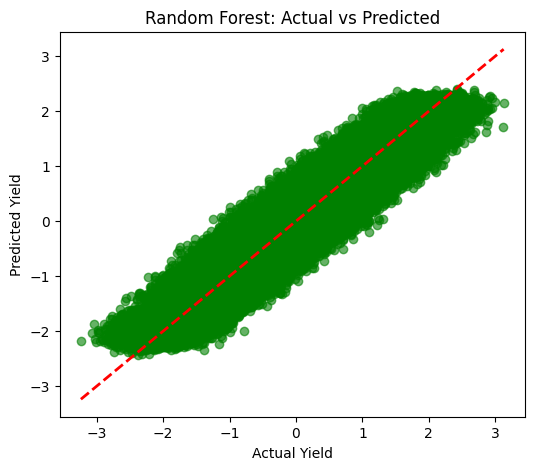

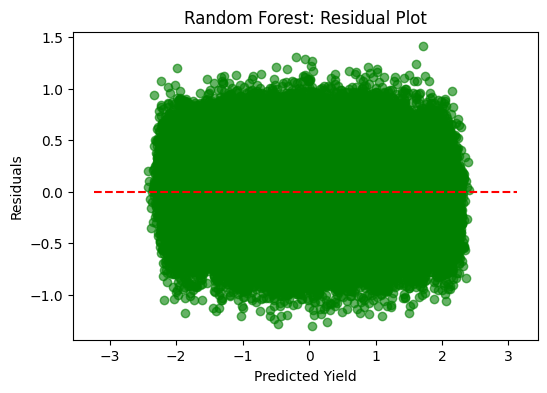

In [22]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Random Forest: Actual vs Predicted')
plt.show()

# Residuals
plt.figure(figsize=(6,4))
plt.scatter(y_pred_rf, y_test - y_pred_rf, alpha=0.6, color='green')
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='--')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Random Forest: Residual Plot')
plt.show()


In [18]:
from xgboost import XGBRegressor

# XGBoost model
xgb = XGBRegressor(n_estimators=50, random_state=42, objective='reg:squarederror')

# Train
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)

print("\nXGBoost:")
print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")



XGBoost:
MAE:  0.2362
MSE:  0.0876
RMSE: 0.2960
R²:   0.9125


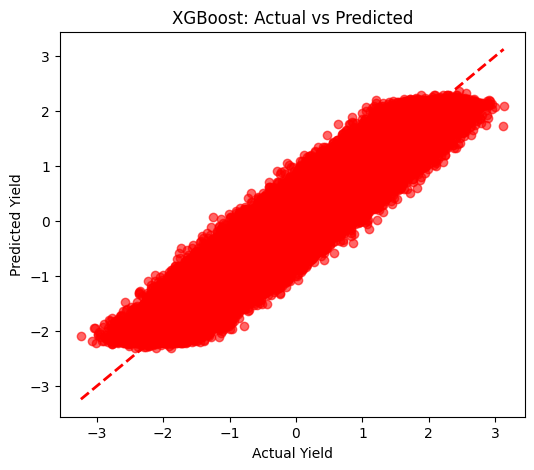

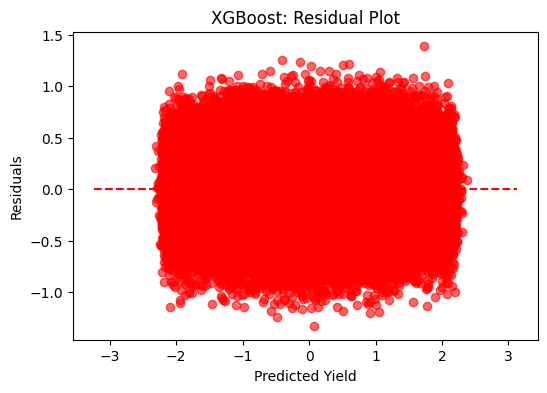

In [23]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('XGBoost: Actual vs Predicted')
plt.show()

# Residuals
plt.figure(figsize=(6,4))
plt.scatter(y_pred_xgb, y_test - y_pred_xgb, alpha=0.6, color='red')
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='--')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('XGBoost: Residual Plot')
plt.show()


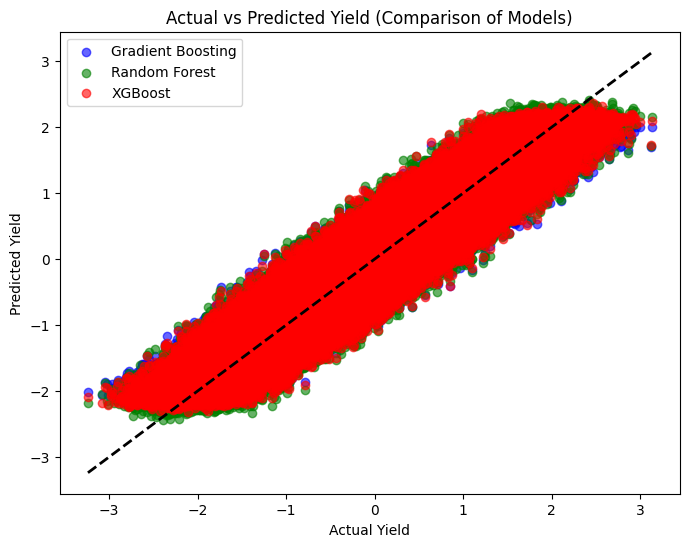

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Gradient Boosting
plt.scatter(y_test, y_pred_gbr, alpha=0.6, label='Gradient Boosting', color='blue')

# Random Forest
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Random Forest', color='green')

# XGBoost
plt.scatter(y_test, y_pred_xgb, alpha=0.6, label='XGBoost', color='red')

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield (Comparison of Models)')
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


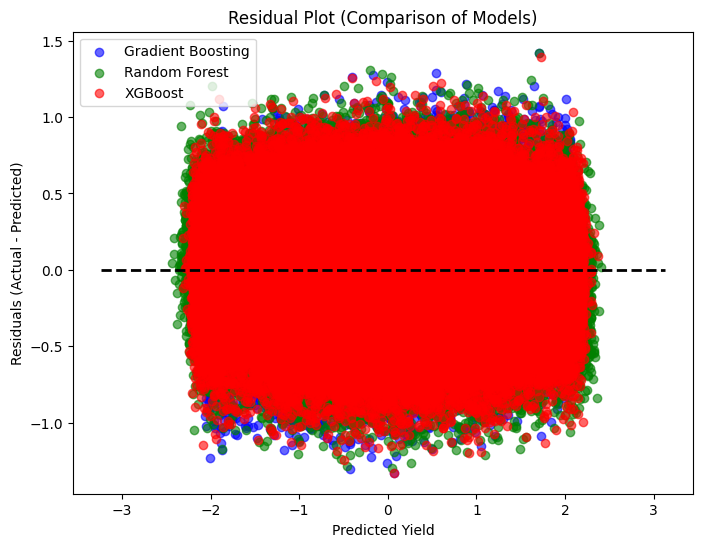

In [20]:
plt.figure(figsize=(8,6))

# Gradient Boosting residuals
plt.scatter(y_pred_gbr, y_test - y_pred_gbr, alpha=0.6, label='Gradient Boosting', color='blue')

# Random Forest residuals
plt.scatter(y_pred_rf, y_test - y_pred_rf, alpha=0.6, label='Random Forest', color='green')

# XGBoost residuals
plt.scatter(y_pred_xgb, y_test - y_pred_xgb, alpha=0.6, label='XGBoost', color='red')

# Zero line
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='k', linestyles='--', lw=2)

plt.xlabel('Predicted Yield')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Comparison of Models)')
plt.legend()
plt.show()


In [24]:
import pandas as pd

metrics = {
    'Model': ['Gradient Boosting', 'Random Forest', 'XGBoost'],
    'MAE': [mean_absolute_error(y_test, y_pred_gbr),
            mean_absolute_error(y_test, y_pred_rf),
            mean_absolute_error(y_test, y_pred_xgb)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_gbr)),
             np.sqrt(mean_squared_error(y_test, y_pred_rf)),
             np.sqrt(mean_squared_error(y_test, y_pred_xgb))],
    'R2': [r2_score(y_test, y_pred_gbr),
           r2_score(y_test, y_pred_rf),
           r2_score(y_test, y_pred_xgb)]
}

df_metrics = pd.DataFrame(metrics)
df_metrics


,Model,MAE,RMSE,R2
0,Gradient Boosting,0.238800,0.299291,0.910568
1,Random Forest,0.244018,0.305825,0.906620
2,XGBoost,0.236173,0.295956,0.912549


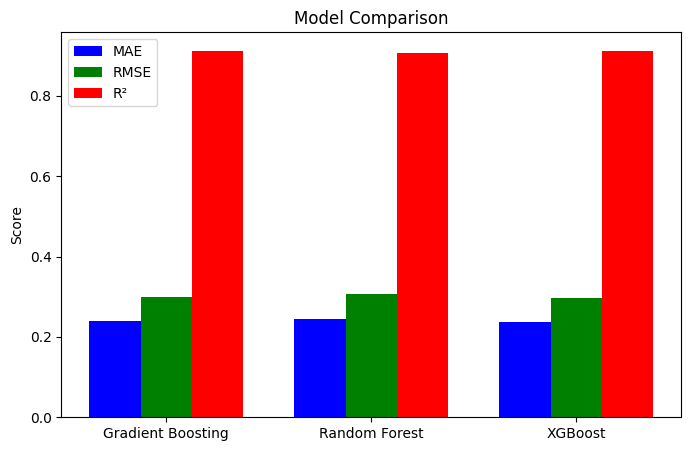

In [25]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(df_metrics['Model']))  # model positions
width = 0.25

plt.figure(figsize=(8,5))

plt.bar(x - width, df_metrics['MAE'], width, label='MAE', color='blue')
plt.bar(x, df_metrics['RMSE'], width, label='RMSE', color='green')
plt.bar(x + width, df_metrics['R2'], width, label='R²', color='red')

plt.xticks(x, df_metrics['Model'])
plt.ylabel('Score')
plt.title('Model Comparison')
plt.legend()
plt.show()


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

bins = [0, 2, 4, 100]
labels = ['Low', 'Medium', 'High']
df_encoded['Yield_Class'] = pd.cut(df_encoded['Yield_tons_per_hectare'], bins=bins, labels=labels)


df_encoded.dropna(subset=['Yield_Class'], inplace=True)

X = df_encoded.drop(['Yield_tons_per_hectare', 'Yield_Class'], axis=1)
y = df_encoded['Yield_Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numeric_cols_to_scale = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']
scaler = StandardScaler()
X_train[numeric_cols_to_scale] = scaler.fit_transform(X_train[numeric_cols_to_scale])
X_test[numeric_cols_to_scale] = scaler.transform(X_test[numeric_cols_to_scale])



Random Forest Accuracy: 0.9662224264705882
              precision    recall  f1-score   support

         Low       0.98      0.99      0.98     96415
      Medium       0.57      0.34      0.43      3681

    accuracy                           0.97    100096
   macro avg       0.77      0.67      0.70    100096
weighted avg       0.96      0.97      0.96    100096



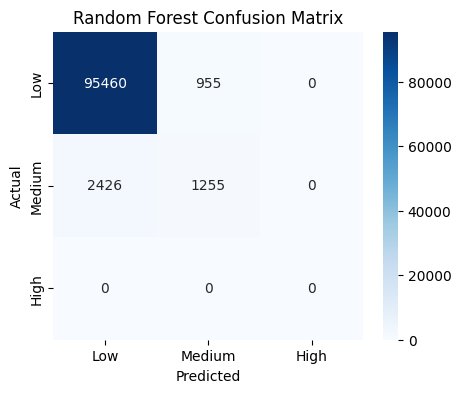

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, zero_division=0))

cm_rf = confusion_matrix(y_test, y_pred_rf, labels=labels)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Gradient Boosting Accuracy: 0.9686600863171355
              precision    recall  f1-score   support

         Low       0.98      0.99      0.98     96415
      Medium       0.61      0.41      0.49      3681

    accuracy                           0.97    100096
   macro avg       0.79      0.70      0.74    100096
weighted avg       0.96      0.97      0.97    100096



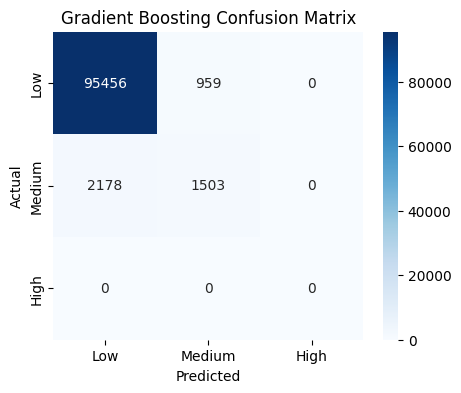

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gbr = GradientBoostingClassifier(n_estimators=50, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gbr))
print(classification_report(y_test, y_pred_gbr, zero_division=0))

cm_gbr = confusion_matrix(y_test, y_pred_gbr, labels=labels)
plt.figure(figsize=(5,4))
sns.heatmap(cm_gbr, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Naïve Bayes Accuracy: 0.9255015185421995
              precision    recall  f1-score   support

         Low       1.00      0.93      0.96     96415
      Medium       0.32      0.93      0.48      3681

    accuracy                           0.93    100096
   macro avg       0.66      0.93      0.72    100096
weighted avg       0.97      0.93      0.94    100096



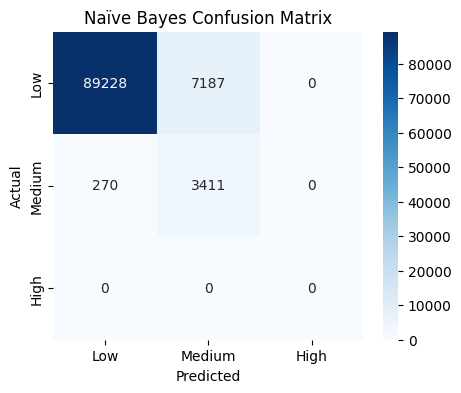

In [33]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb, zero_division=0))

cm_nb = confusion_matrix(y_test, y_pred_nb, labels=labels)
plt.figure(figsize=(5,4))
sns.heatmap(cm_nb, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Naïve Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


XGBoost Accuracy: 0.9684602781329923
              precision    recall  f1-score   support

         Low       0.98      0.99      0.98     96415
      Medium       0.61      0.40      0.48      3681

    accuracy                           0.97    100096
   macro avg       0.79      0.69      0.73    100096
weighted avg       0.96      0.97      0.97    100096



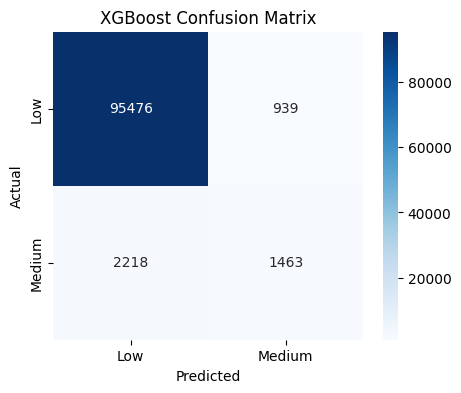

In [34]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Low->0, Medium->1, High->2

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# -------------------------------
# XGBoost Classifier
# -------------------------------
xgb = XGBClassifier(n_estimators=50, random_state=42, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, zero_division=0, target_names=le.classes_))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Gradient Boosting Accuracy: 0.9686600863171355
              precision    recall  f1-score   support

         Low       0.98      0.99      0.98     96415
      Medium       0.61      0.41      0.49      3681

    accuracy                           0.97    100096
   macro avg       0.79      0.70      0.74    100096
weighted avg       0.96      0.97      0.97    100096



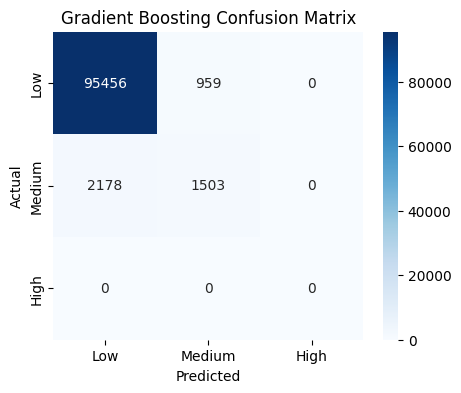

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbr = GradientBoostingClassifier(n_estimators=50, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gbr))
print(classification_report(y_test, y_pred_gbr, zero_division=0))

cm_gbr = confusion_matrix(y_test, y_pred_gbr, labels=labels)
plt.figure(figsize=(5,4))
sns.heatmap(cm_gbr, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
